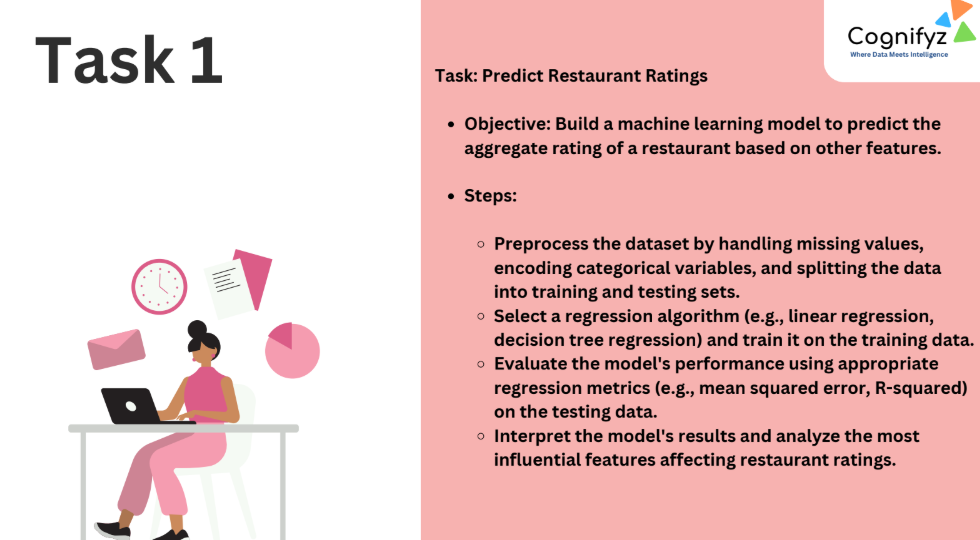

I took the restaurant dataset, removed empty ratings, dropped extra columns like ID, address, votes, rating colour&text, filled missing numbers with median and text with mode, then used Label encoding to convert categories to numbers. then i split the data into train/test, trained a DecisionTreeRegressor (max depth 8) to predict Aggregate Rating, checked performance using RMSE and R2, showed a table of actual vs predicted ratings, then plotted a scatter plot for accuracy check and a bar chart for feature importance

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv("/Dataset .csv")
restaurant_names = df["Restaurant Name"]
df = df.dropna(subset=["Aggregate rating"])
drop_cols = ["Restaurant ID", "Address", "Locality Verbose", "Locality", "Votes", "Rating color", "Rating text"]
df = df.drop(columns=drop_cols, errors='ignore')


In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [22]:
X = df.drop(columns=["Aggregate rating"], errors='ignore')
y = df["Aggregate rating"]
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(
    X, y, restaurant_names, test_size=0.2, random_state=42)


In [23]:
model = DecisionTreeRegressor(random_state=42, max_depth=8)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, random_state=42)

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 1.185
R² Score: 0.383


In [25]:
comparison_df = pd.DataFrame({
    "Restaurant Name": names_test.values,
    "Actual Rating": y_test.values,
    "Predicted Rating": np.round(y_pred, 2)
}).reset_index(drop=True)

print("\nSample Predictions:")
print(comparison_df.head(15))



Sample Predictions:
        Restaurant Name  Actual Rating  Predicted Rating
0            Wah Ji Wah            2.1              1.60
1   19 Flavours Biryani            4.1              3.13
2    Andaaz E Paranthas            3.2              2.24
3                Tony's            4.4              3.40
4            Yummy Adda            3.5              1.60
5             Tea Point            0.0              1.32
6              Rainbows            3.2              3.40
7      Bansiwala Sweets            0.0              1.51
8      Green Restaurant            3.6              2.74
9          Me Kong Bowl            4.0              3.42
10        Drifters Cafe            3.9              3.11
11  Jiya Amritsari Naan            0.0              2.16
12   Tandoori KnockOuts            4.2              3.42
13   Chocolate Fountain            0.0              1.51
14        Kay's Chik-In            2.6              2.84


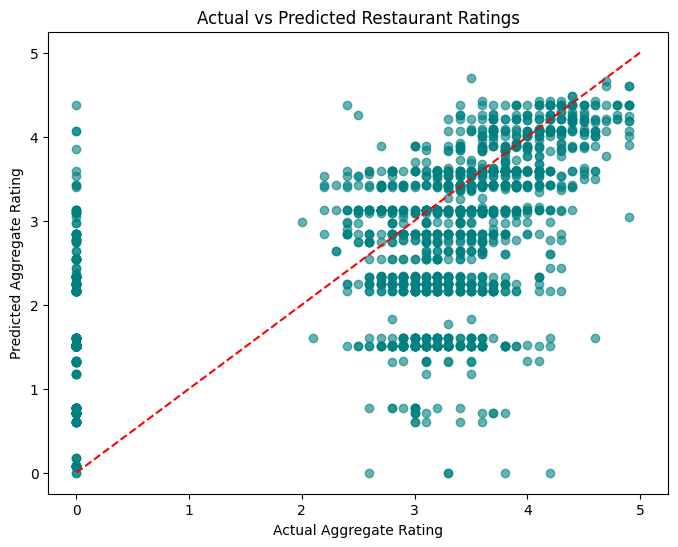

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel("Actual Aggregate Rating")
plt.ylabel("Predicted Aggregate Rating")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.show()


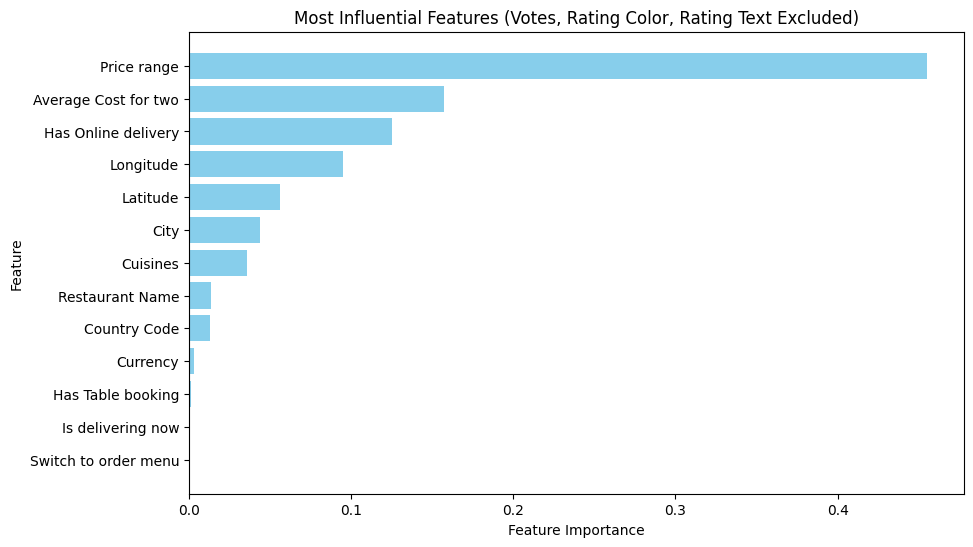

In [27]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Most Influential Features (Votes, Rating Color, Rating Text Excluded)")
plt.gca().invert_yaxis()
plt.show()


price range contributes most to the aggregate ratings